# Due June/20/2018 11:59:59 PM, PST.

## Probability Review (10%)
In a certain day care class, 30% of the children have grey eyes, 50% of them have blue and the other 20%'s eyes are in other colors. One day they play a game together. In the first run, 65% of the grey eye ones, 82% of the blue eyed ones and 50% of the children with other eye color were selected. Now, if a child is selected randomly from the class, and we know that he/she was not in the first game, what is the probability that the child has blue eyes?

## Suppose a class had 100x students

30% of children have grey eyes = 30% * 100 = 30x

50% of children have blue eyes = 50% * 100 = 50x

20% having other colors        = 20% * 100 = 20x
## In the first run

65% of the grey ones selected = 65% * 30 = 19.5x

82% of the blue eyed ones     = 82% * 50 = 41x

50% with other eyed color     = 50% * 20 = 10x
## Not slected in the first run

Grey eyed ones = (30-19.5) = 10.5x

Blue eyed ones = (50-41)   = 9x

Other eyed ones = (20-10)  = 10x
## Probability that the child has blue eyes = 9x/(10.5x + 9x+ 10x) =  0.30508


## Linear Algebra Review (10%)
(1) What is Gram-Schmidt procedure ? 
<br>
(2) Do Gram-Schmidt procedure for the vectors x1 = (1, 1 ,0), x2 = (1, 0, 1), x3 = (0, 1, 1) in $R^3$.

## Gram-Schmidt procedure
Gram-Schmidt orthogonalization, also called the Gram-Schmidt process, is a procedure which takes nonorthogonal set of linearly independent functions and constructs an orthogonal basis over an arbitrary interval with respect to an arbitrary weighting function w(x).


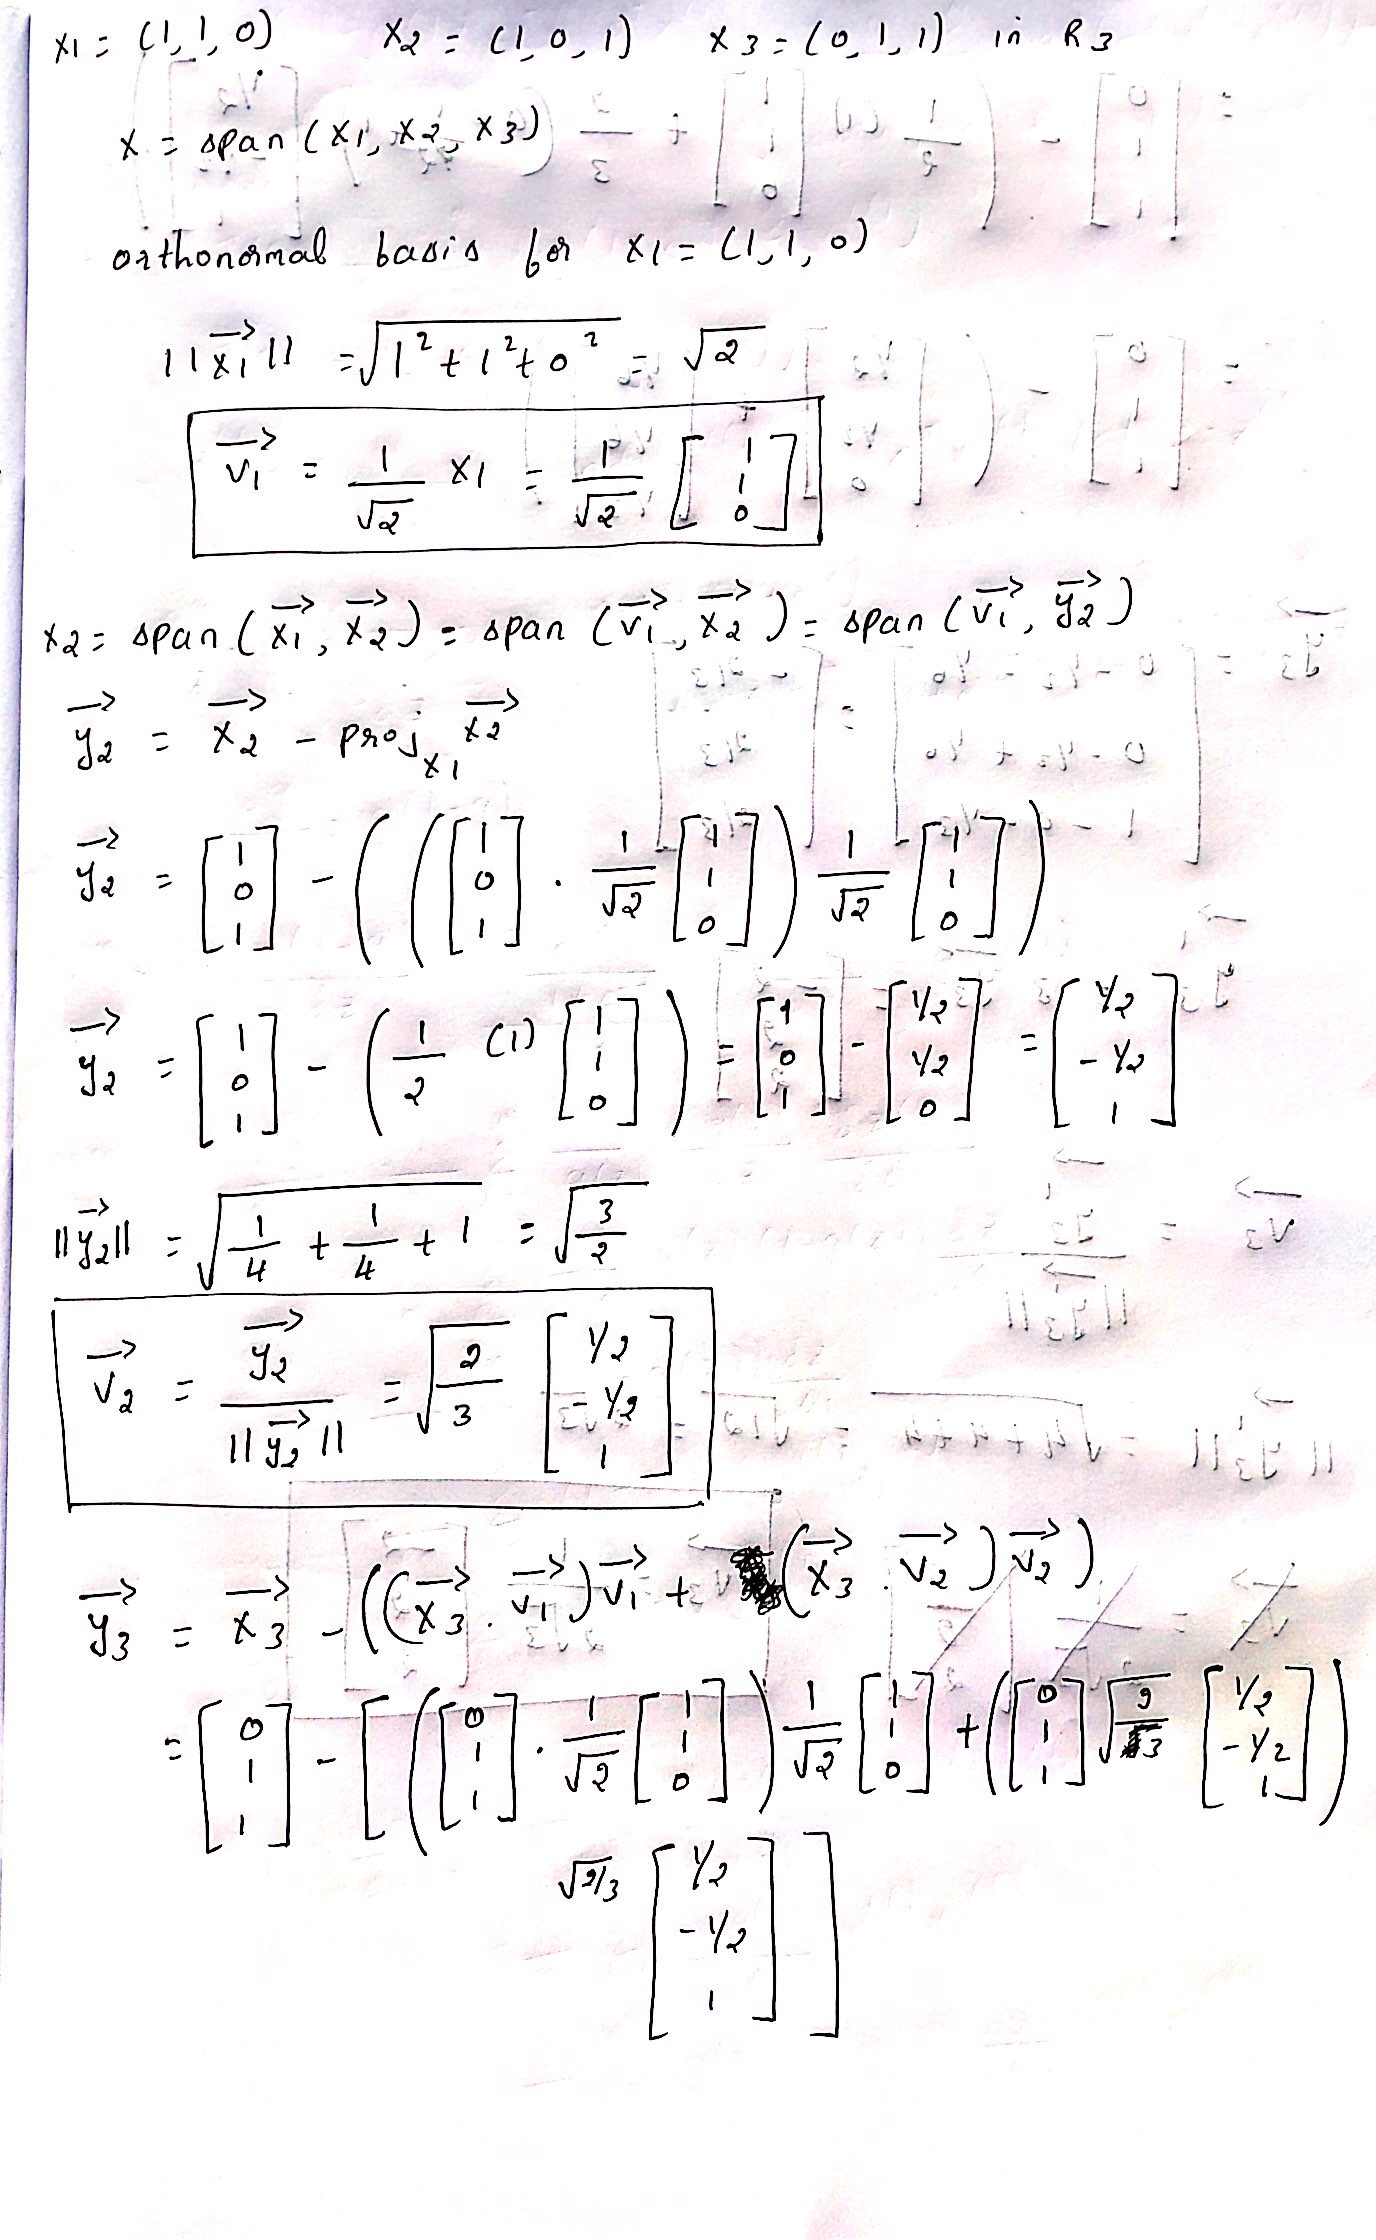

In [9]:
# Solution to Gram-Schmidth procedure for vectors x1 = (1,1,0) and x2 = (1,0,1) 
from IPython.display import Image
Image(filename="/Users/pavanhr/Desktop/gram-1.jpg", width=400, height=400)

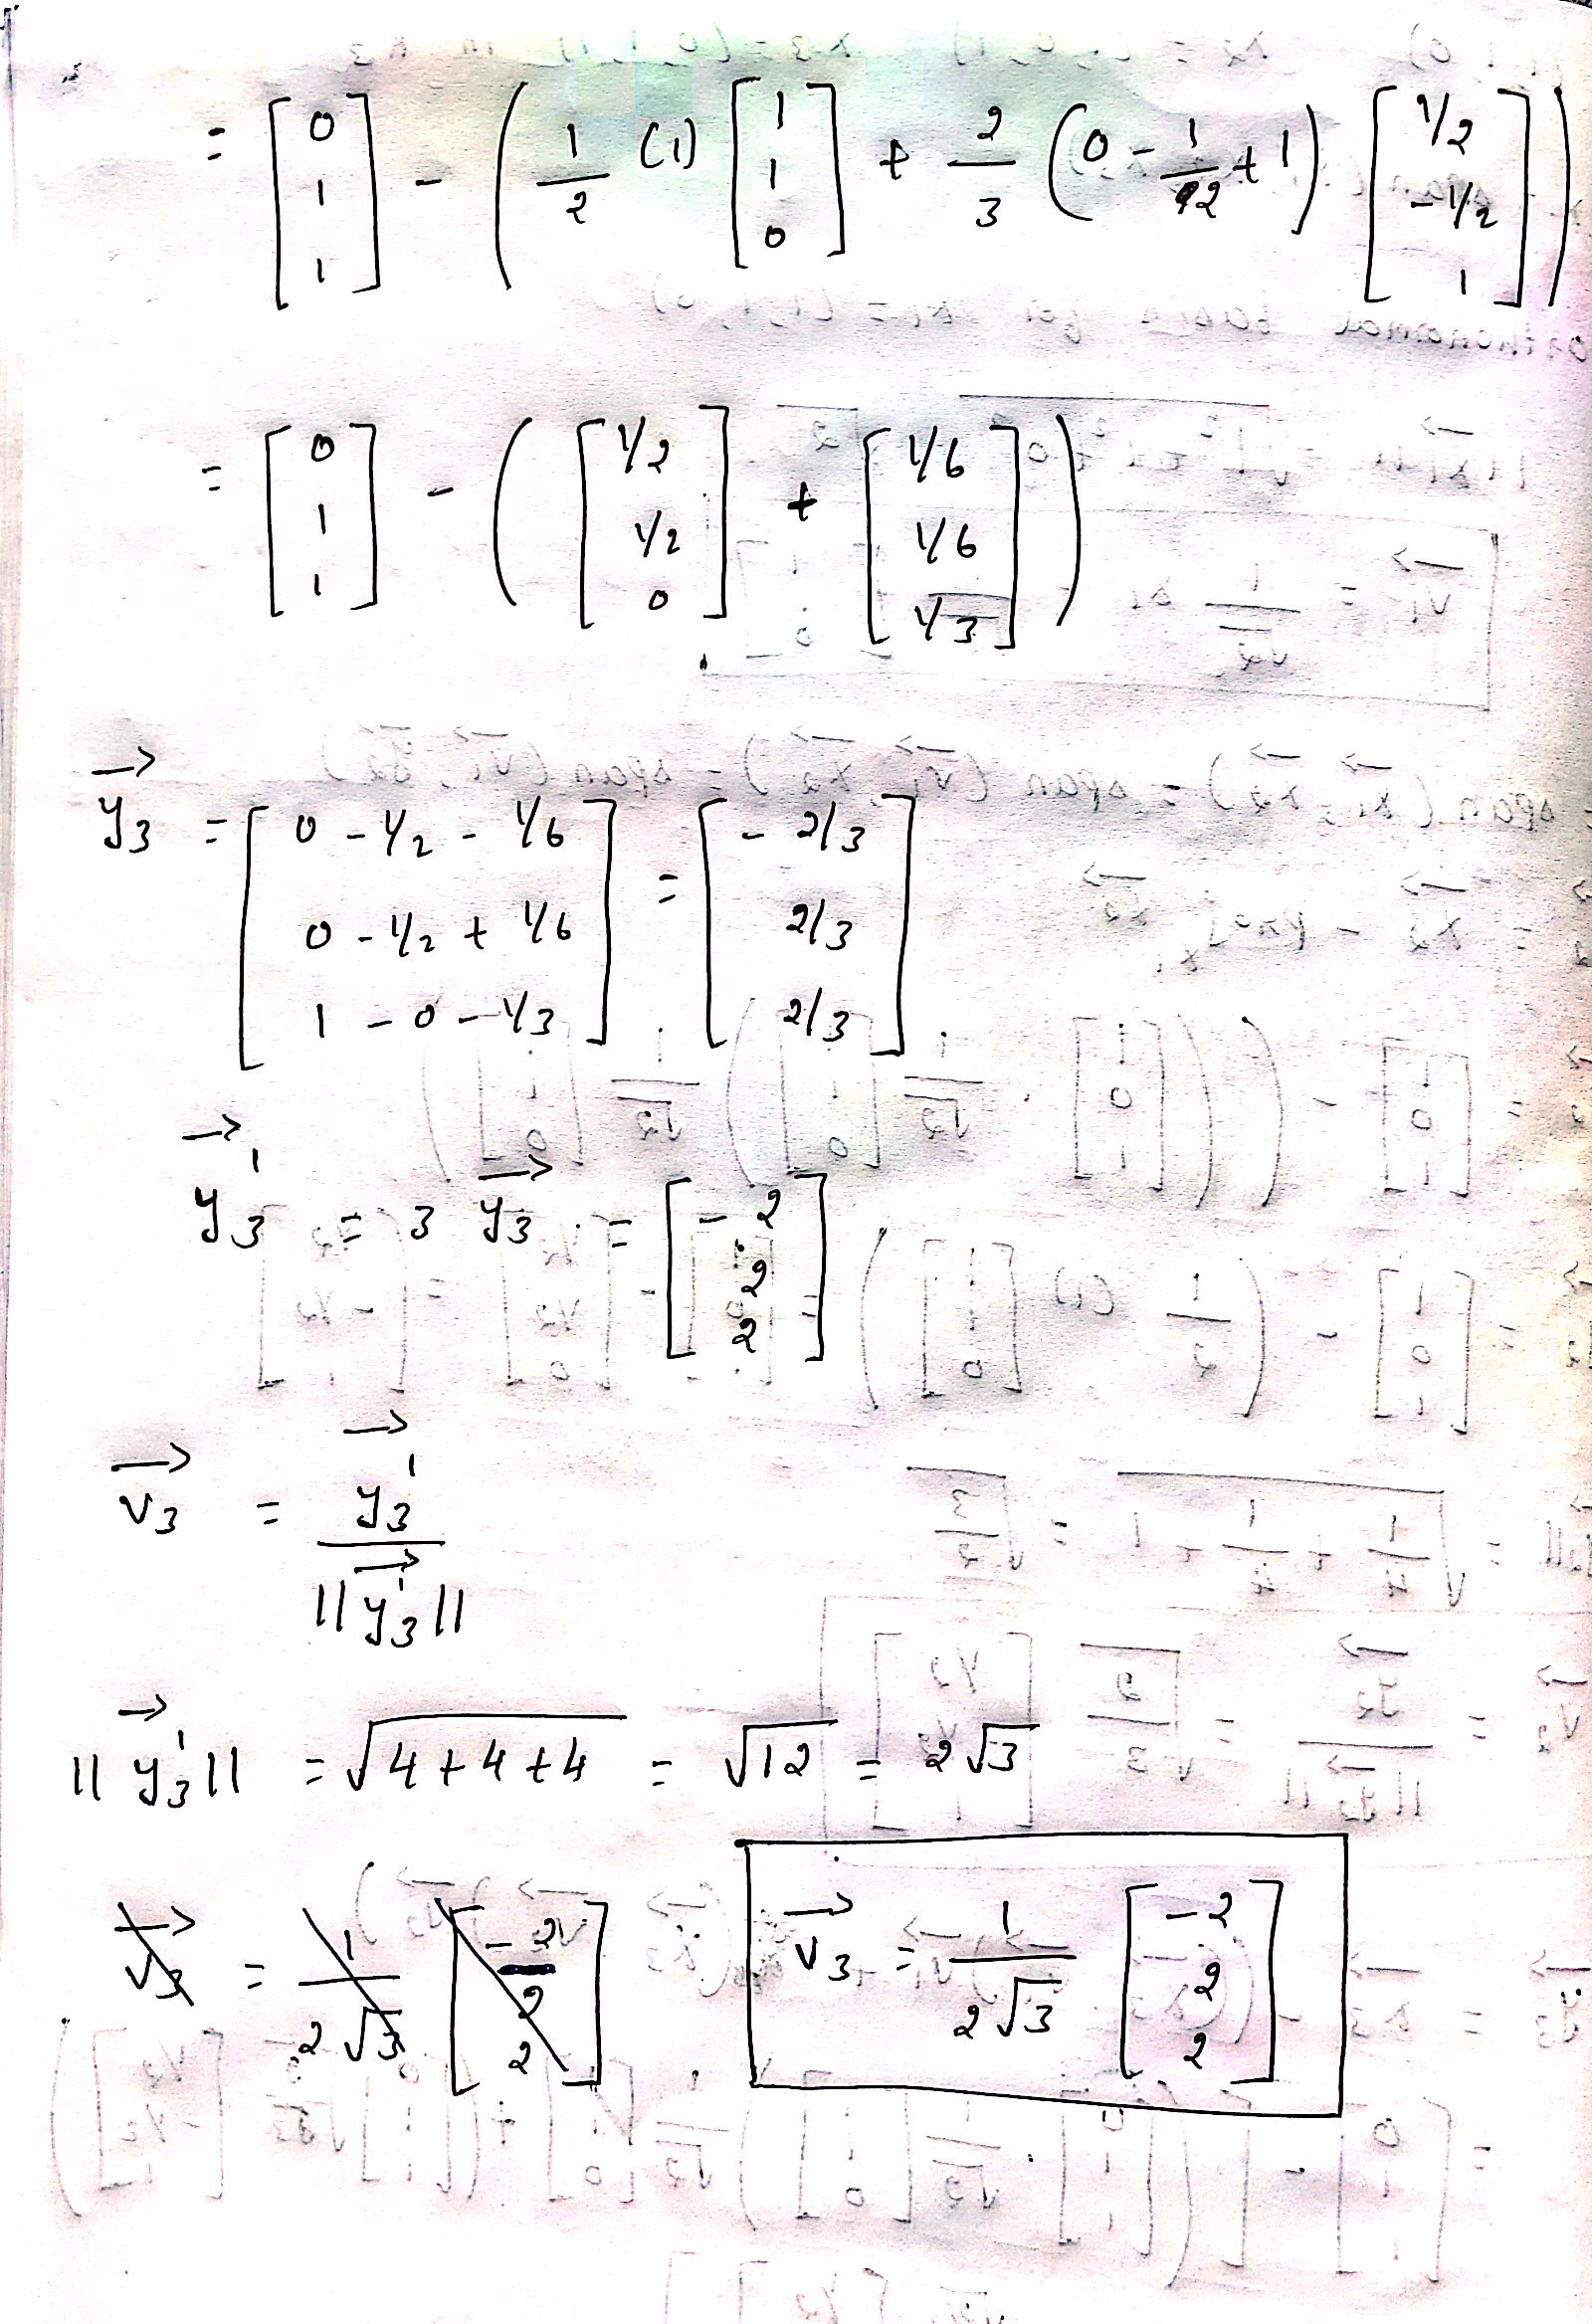

In [10]:
# Solution to Gram-Schmidth procedure for vectors x3 = (0,1,1) 
from IPython.display import Image
Image(filename="/Users/pavanhr/Desktop/gram-2.jpg", width=400, height=400)

## Hessian for Logistic Regression (10%)
Consider the average empirical loss  for logistic regression:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \log (1 + e^{-y_i \theta^T x_i}) = - \frac{1}{m} \sum_{i=1}^{m} \log (h_{\theta}(y_i x_i)))$$

where $h_{\theta}(x) = g(\theta^{T} x)$ and $g(z) = \frac{1}{1 + e^{-z}}$. 

(1) Find the Hessian $H$ of $J(\theta)$.
<br>
(2) Show that Hessian is non-negative definite.



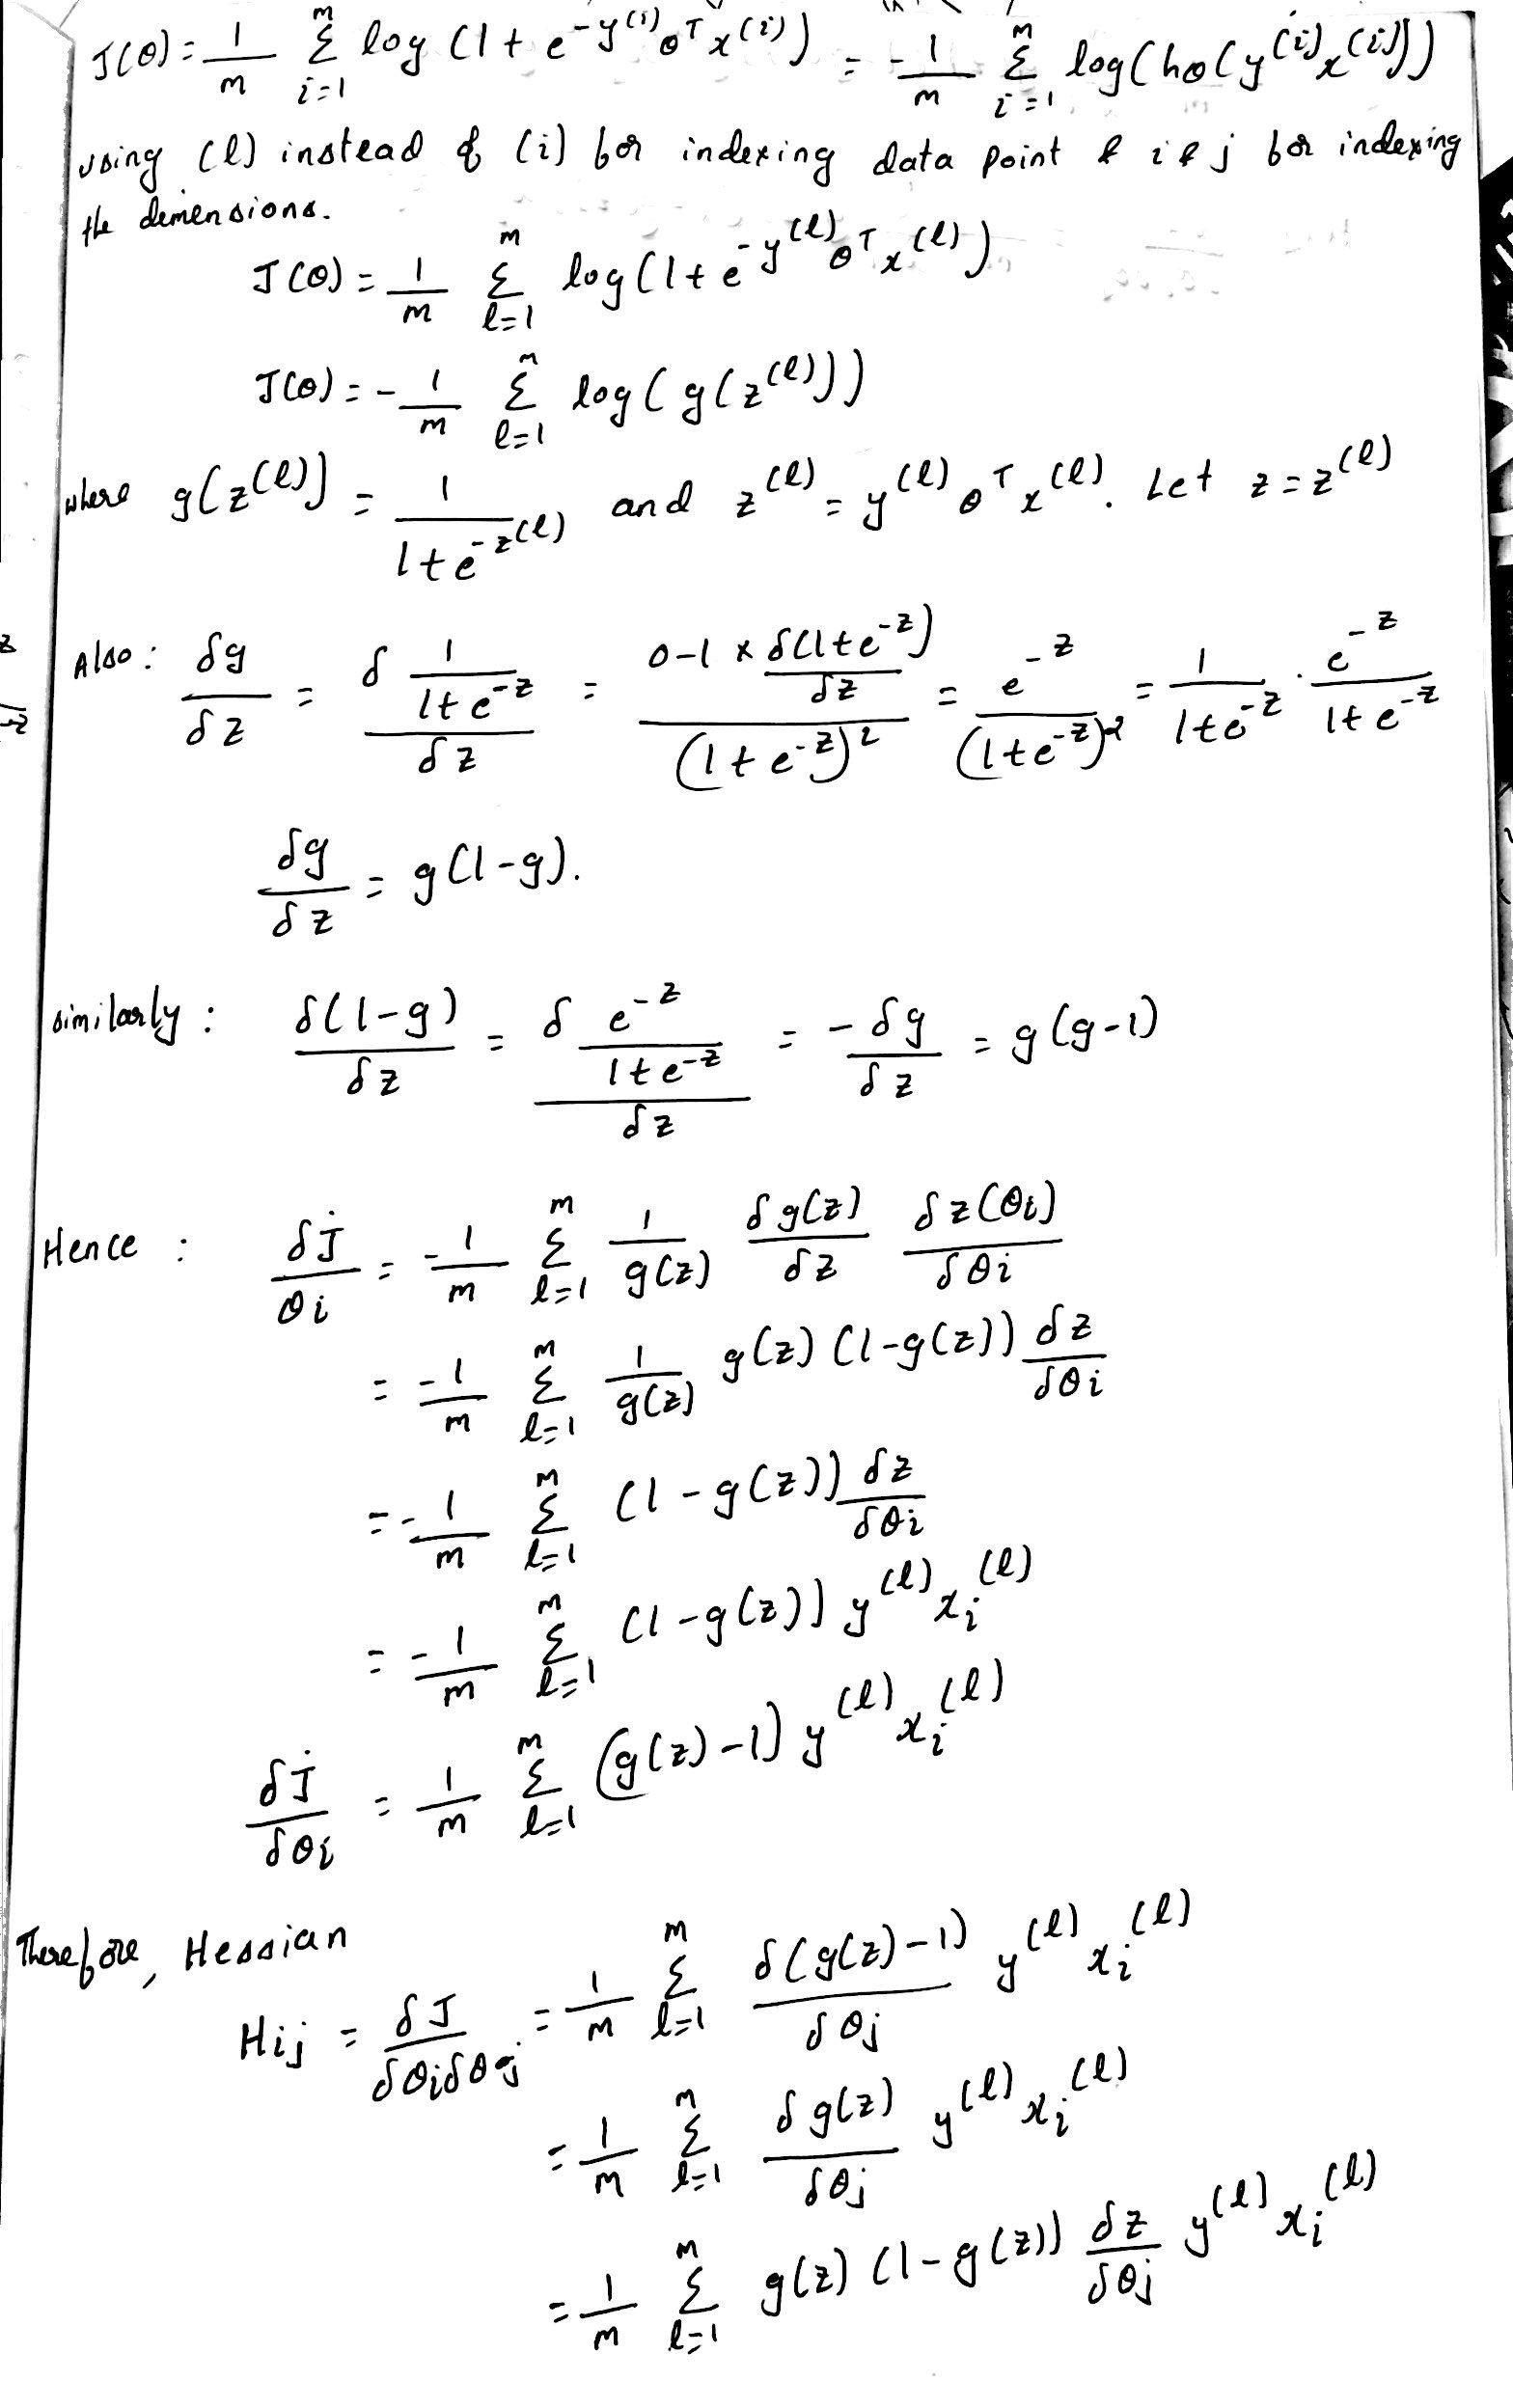

In [2]:
# Solution to find Hessian H
from IPython.display import Image
Image(filename="/Users/pavanhr/Desktop/mal1-1.png", width=400, height=400)

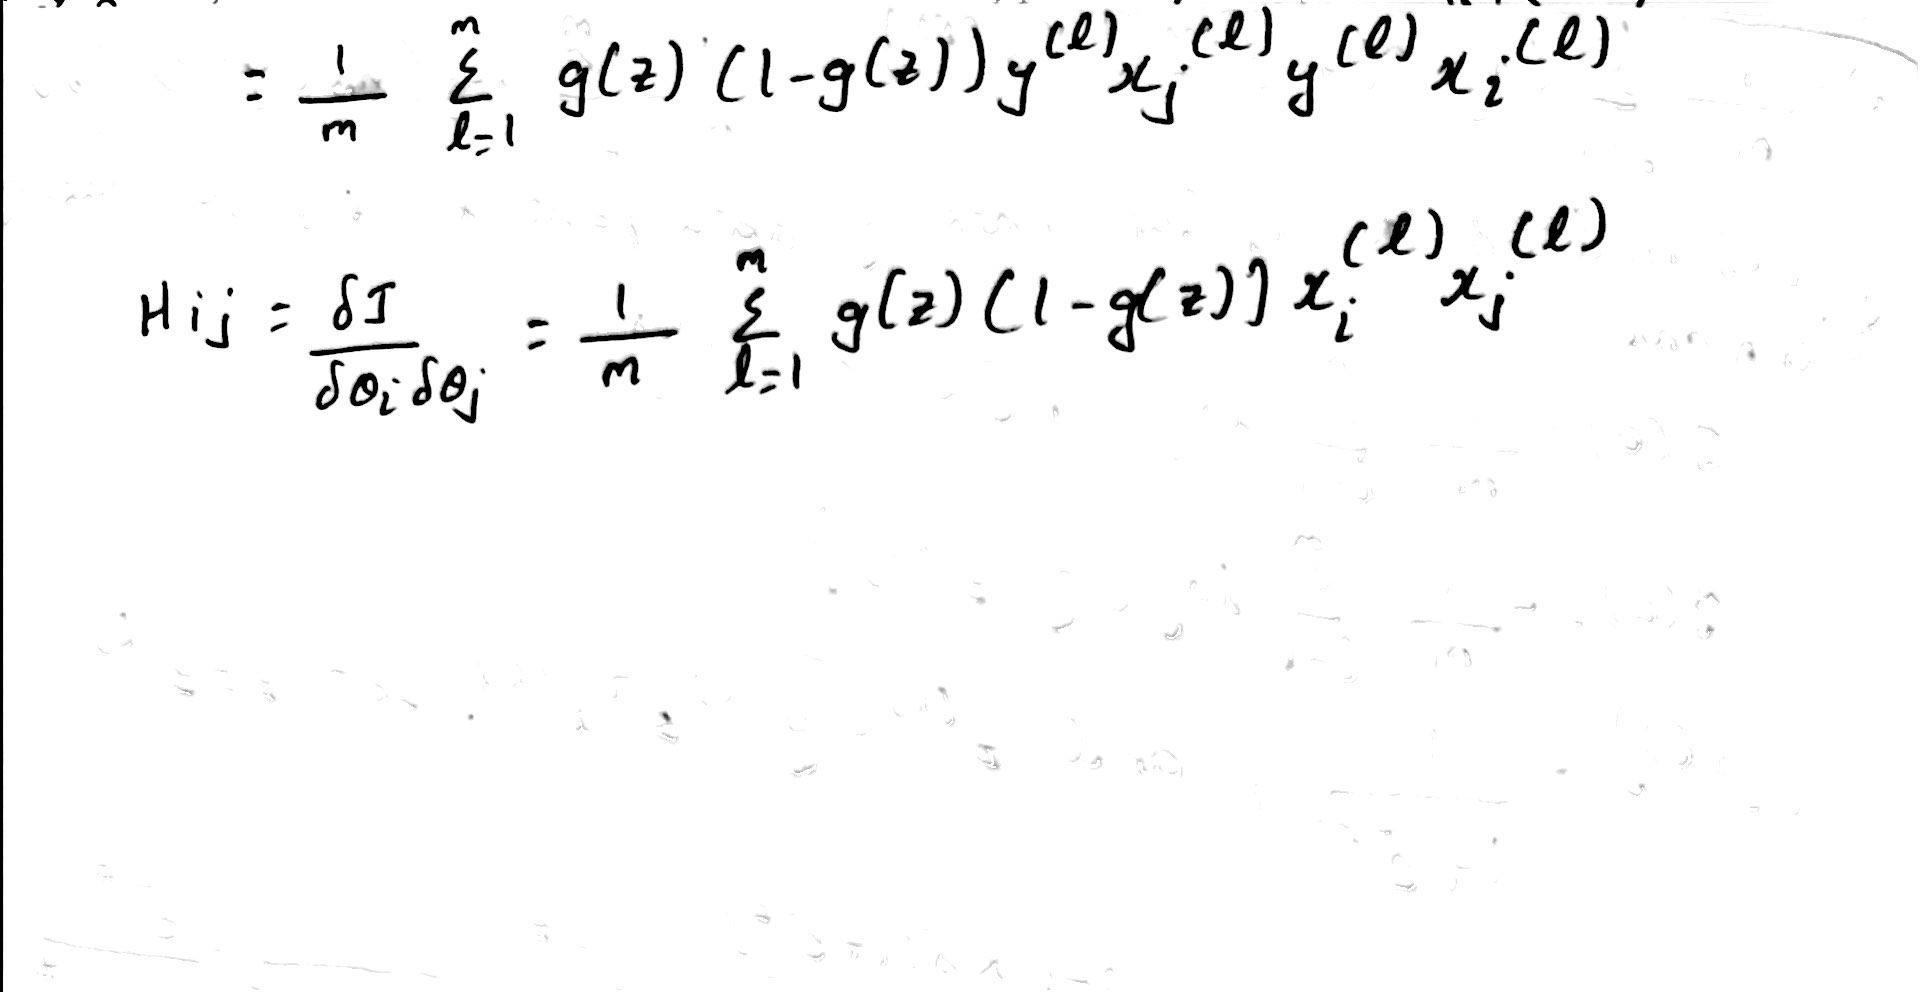

In [3]:
# Solution to find Hessian H continued
from IPython.display import Image
Image(filename="/Users/pavanhr/Desktop/mal1-2.png", width=400, height=400)

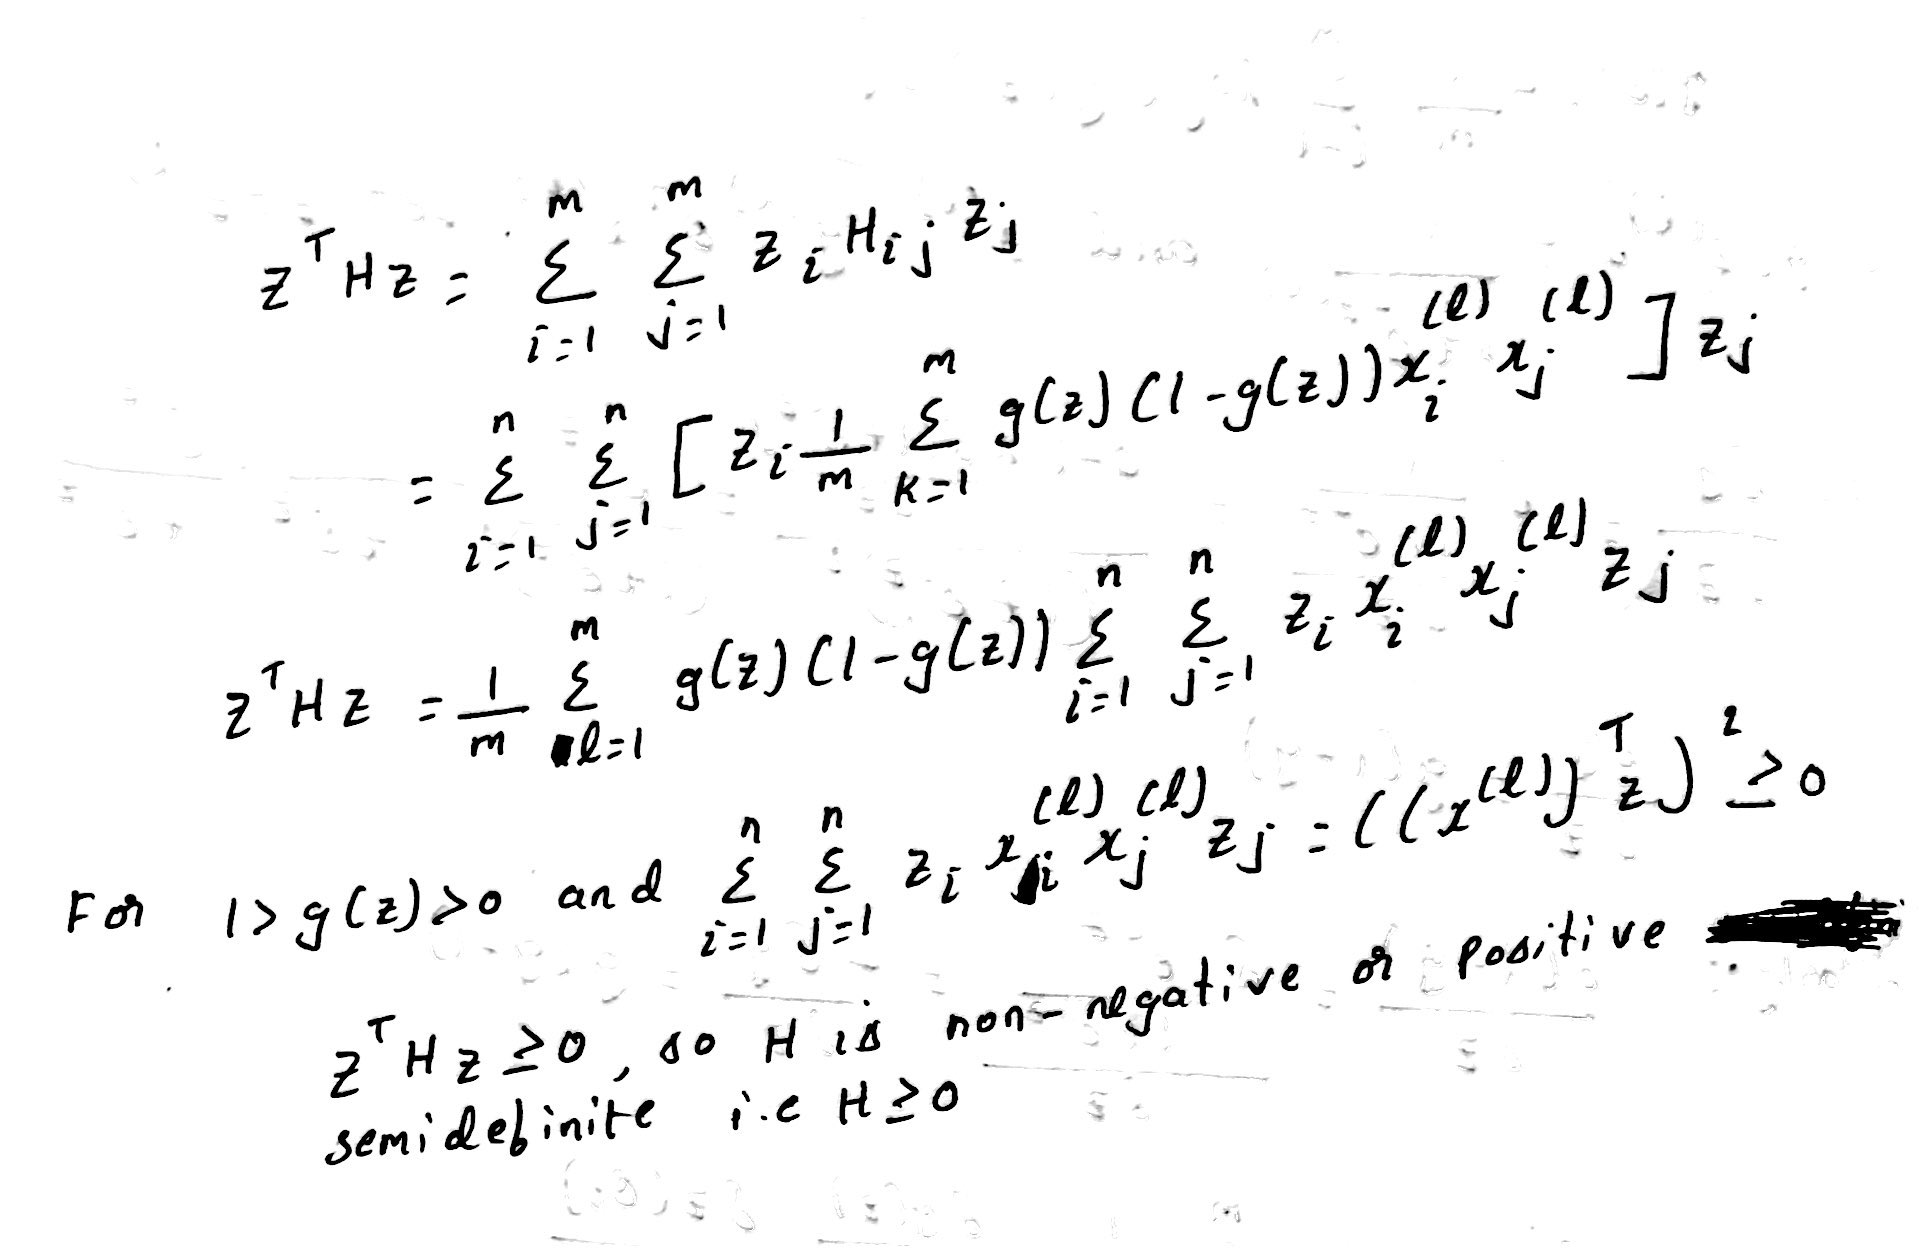

In [5]:
# Solution to find Hessian H continued
from IPython.display import Image
Image(filename="/Users/pavanhr/Desktop/ml-1.png", width=400, height=400)

### linear regression model using stochastic gradient (40%)

In this problem, we will train a linear regression model using stochastic gradient descent on the
Wine Quality dataset. The data provide to train is "winequality-white.csv". We will partition the problem into following three parts:

<br>

A. Making Predictions

<br>

B. Esimating Coefficients

<br>

C. Wine Quality Testing

The Wine Quality Dataset involves predicting the quality of white wines on a scale given
chemical measures of each wine. It is a multiclass classication problem, but could also be
framed as a regression problem. The number of observations for each class is not balanced.
There are 4,898 observations with 11 input variables and 1 output variable. The variable names
are as follows:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide.
7. Total sulfur dioxide.
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).


In [9]:
# Possible Python lib required to run this problem. 
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import numpy as np

### A. Making Prediction
### Given dataset with 5 point, the first is input value, 
### and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]

### Also given linear model coefficient as 

coef = [0.5, 0.8]

### where the first component is b0 and the second component is b1 and 
### model is assumed as y = b0 + b1*x

### Can you write a predict function to return predicted value?



In [10]:
dataset = np.array([[1,1],[2,3],[4,3],[3,2],[5,5],[6,6]])
X = dataset[:, 0].reshape(-1,1) 
y = dataset[:, 1].reshape(-1,1)
def predict(dataset):
    b0 = 0.5
    b1 = 0.8
    prediction = b0 + b1*(dataset[:, 0].reshape(-1,1))
    return prediction
predict(dataset)
    

array([[1.3],
       [2.1],
       [3.7],
       [2.9],
       [4.5],
       [5.3]])

### B. Esimating Coefficients



### Given dataset with 6 point, the first is input value, and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6, 6]]

l_rate = 0.01

n_epoch = 50

### Can you write a function to return coefficients based on stochastic gradient descent method 

In [11]:

    
def coefficients(model, l_rate, n_epoch):
    coef = [0.0,0.0]
    for epoch in range(n_epoch):
        for row in model:
            y_value = estimate(row, coef)
            # Finding error
            error = y_value - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    return coef

def estimate(row, coefficients):
    y_value = coefficients[0]
    for i in range(len(row)-1):
        y_value += coefficients[i + 1] * row[i]
        return y_value
    

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]
l_rate = 0.001
n_epoch = 50
sgd_coef = coefficients(dataset, l_rate, n_epoch)
print(sgd_coef)

 

[0.205022667788194, 0.8921013024625108]


###### C. Wine Quality Testing

If we partition the data set uniformly into 6 parts, could you write a code to get the average value of absoulte error between prediction and expected (average over these 6 partitoned datasets)?

In [12]:
# Load a CSV file
def load_modify(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    print("Data Loaded !!!")  
    
    # Convert string column to float
    for i in range(len(dataset[0])):
        for row in dataset:
            row[i] = float(row[i].strip())
    print("String to Float conversion completed.")
            
    # Find the min and max values for each column        
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
        
    # Normalization using minmax
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    print("Data Normalization completed.")
    
    return dataset

def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, n_folds, *args):
    # Splitting data uniformly into 6 folds
    folds = cross_validation_split(dataset, n_folds)    
    print("data partitioned uniformely into 6 folds")
    print('-------------------------------------------')
    # Algorithm evaluation
    scores = list()
    i = 0
    for fold in folds:
        i = i+1
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = linear_regression_sgd(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        rmse = rmse_metric(actual, predicted)
        print("RMSE score of dataset %d is:%s"%(i,rmse))
        scores.append(rmse)
    return scores

# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    # Finding Coefficients
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    # Predictions
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = '/Users/pavanhr/Desktop/winequality-white.csv'
dataset = load_modify(filename)

# Parameters
n_folds = 6
l_rate = 0.01
n_epoch = 50
# evaluate algorithm
scores = evaluate_algorithm(dataset, n_folds, l_rate, n_epoch)
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

Data Loaded !!!
String to Float conversion completed.
Data Normalization completed.
data partitioned uniformely into 6 folds
-------------------------------------------
RMSE score of dataset 1 is:0.1238006323609593
RMSE score of dataset 2 is:0.1274681030995875
RMSE score of dataset 3 is:0.1271723426166638
RMSE score of dataset 4 is:0.1297916054700647
RMSE score of dataset 5 is:0.12547865697125654
RMSE score of dataset 6 is:0.12441505400726313
Mean RMSE: 0.126


### Naive Bayes Classifier for Digit Recognition (30%)

In [13]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [14]:


# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0


# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]



data shape:  (70000, 784)
label shape: (70000,)


### A. Create a 10x10 grid to visualize 10 examples of each digit.

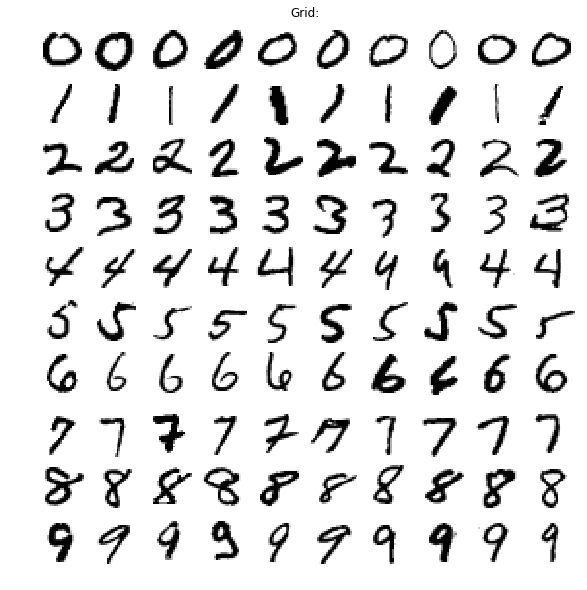

In [15]:
def plot(instances, images_per_row=10, **options):
    size = 28
    images = [instance.reshape(size,size) for instance in instances]
    rimages = images[:10]
    return rimages
plt.figure(figsize=(10,10))
row_images = []
for i in range(10):
    X_aa = train_data[(train_labels == i) ]
    rimages = plot(X_aa[:10], images_per_row=10)
    row_images.append(np.concatenate(rimages, axis=1))
image = np.concatenate(row_images, axis=0)
plt.imshow(image, cmap = matplotlib.cm.binary)
plt.title("Grid:")
plt.axis("off")
plt.show()

### B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

#Images = 70000 and #Pixel per image = 784
First image shows 1
The corresponding matrix version of image is 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

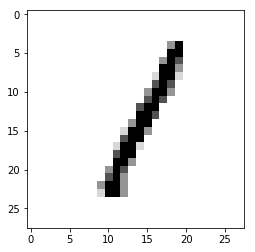

In [16]:
print("#Images = %d and #Pixel per image = %s" % (X.shape[0], X.shape[1]))
#Print first row of the dataset 
img = X[0]
print("First image shows %d" % (Y[0]))
print("The corresponding matrix version of image is \n" , img)
print("The image in grey shape is ")
plt.imshow(img.reshape(28, 28), cmap="Greys")
# Get all the zero'd images
zeros_data = mnist.data[mnist.target==0]
# Get all the one'd images
ones_data = mnist.data[mnist.target==1]
# Merge them to create a new dataset
binary_class_data = np.vstack([zeros_data, ones_data])
binary_class_labels = np.hstack([np.repeat(0, zeros_data.shape[0]), np.repeat(1, ones_data.shape[0])])
np.random.seed(1234)
print("Shape of data and labels are :" , binary_class_data.shape, binary_class_labels.shape)
# Take 5000 to train and the rest to test
orig_binary_class_training_data = binary_class_data[:5000]                                                  
binary_class_training_labels = binary_class_labels[:5000]                                                   
orig_binary_class_testing_data = binary_class_data[5000:]                                                   
binary_class_testing_labels = binary_class_labels[5000:]
# Normalize so that the values are between 0 and 1
binary_class_training_data = orig_binary_class_training_data / 255.0                                        
binary_class_testing_data = orig_binary_class_testing_data / 255.0
scaled_training_data = train_data / 255.0                                                                                
scaled_testing_data = test_data / 255.0
print(binary_class_training_data[0,:])                                                                         
                                        

In [17]:
# Create model
bernouli_nb = BernoulliNB(binarize = True)
# Train model
bernouli_nb.fit(train_data, train_labels)
print(bernouli_nb)
# Predict model
mini_train_labels = bernouli_nb.predict(binary_class_testing_data)
accuracy_score(binary_class_testing_labels,mini_train_labels)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


0.8054192229038855

In [18]:
# Create model
multi_nb = MultinomialNB()
# Train model
multi_nb.fit(train_data, train_labels)
print(multi_nb)
# Predict model
mini_train_labels = multi_nb.predict(binary_class_testing_data)
accuracy_score(binary_class_testing_labels,mini_train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


0.9315950920245398

The Bernoulli Naive Bayes model is similar to the Multinomial Naive Bayes model, but instead of counting how often an event occurred, it only describes whether or not an event occurred

The Multinomial Naive Bayes model counts how often a certain event occurs in the dataset

### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [19]:
cls = GaussianNB()
cls.fit(train_data, train_labels)
cls.score(train_data, train_labels)

0.5634666666666667

GaussianNB only estimates the mean and the standard deviation from the training data.

In [20]:
# Create model
gaus_nb = GaussianNB()
# Train model
gaus_nb.fit(train_data, train_labels)
print(gaus_nb)
# Predict model
mini_train_labels = gaus_nb.predict(binary_class_testing_data)
accuracy_score(binary_class_testing_labels,mini_train_labels)

GaussianNB(priors=None)


0.938241308793456